# Project 2: Analysis of the real estate market of the City of Buenos Aires

![title](img/properati.png)

In this project we are going to work with a dataset of properties for sale published on the [Properati portal](http://www.properati.com.ar). 

## 🏠 Dataset: properties for sale in the City of Buenos Aires

### Atributtes

Next we will describe the attributes that we considered:

* **id**: property id
* **created_on**: date the property entered the site
* **operation**: rent or sell
* **property_type**: type of property (house, apartment, ph, etc.)
* **place_with_parent_names**: name of the place where the property is located according to the publisher
* **lat-lon**: concatenated coordinates
* **lat**: latitude
* **lon**: length
* **price**: price
* **currency**: currency in which the publication is expressed
* **price_aprox_usd**: approximate price in US dollars
* **surface_total_in_m2**: total area (in square meters)
* **surface_covered_in_m2**: covered area (in square meters)
* **price_usd_per_m2**: price per square meter in dollars (dollar price / area) 
* **floor**: floor number (if applicable)
* **rooms**: number of rooms
* **expenses**: expenses (if applicable)
* **barrio**: neighborhood according to official cartography
* **properati_url**: url of the publication in Properati

## 📤 Importing the necessary libraries

In [558]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data visualization
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
# Figure size settings
plt.rcParams['figure.figsize'] = (10,6)
# Setting pandas options on columns and their width.
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
sns.set_context("notebook")
# Ignore annoying warning
import warnings
warnings.filterwarnings("ignore")
import folium  # interactive map
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy import stats

## 💾 Loading data

In [343]:
# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv('data/properati/datos_properati.csv', parse_dates=['created_on'])\
       .rename(columns={'barrio': 'neighborhood'})

## 📊 Exploring data

In [344]:
# Dataset shape
df.shape

(18979, 17)

In [345]:
# Print the first 5 rows of data from the dataframe
df.head()

created_on operation property_type  \
0 2017-09-22      sell         house   
1 2017-08-01      sell         store   
2 2017-08-02      sell         store   
3 2017-08-03      sell         store   
4 2017-08-08      sell         store   

                             place_with_parent_names  \
0  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1                |Argentina|Capital Federal|Palermo|   
2   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3                |Argentina|Capital Federal|Palermo|   
4           |Argentina|Capital Federal|Barrio Norte|   

                         lat-lon        lat        lon  price_aprox_usd  \
0  -34.5889531469,-58.4298817776 -34.588953 -58.429882        2000000.0   
1          -34.586069,-58.414431 -34.586069 -58.414431         790000.0   
2         -34.589723,-58.4325664 -34.589723 -58.432566         343000.0   
3        -34.5923646,-58.4144028 -34.592365 -58.414403         145000.0   
4   -34.585652875,-58.4114933233 -34.585653 -58.411493         175000.0   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  rooms  \
0                312.0                    NaN       6410.256410    NaN    NaN   
1                121.0                  121.0       6528.925620    NaN    NaN   
2                122.0                  108.0       2811.475410    NaN    2.0   
3                 24.0                   24.0       6041.666667    NaN    NaN   
4                 24.0                   24.0       7291.666667    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                                                                                    properati_url  \
0                                                                               https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba   
1                       https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios   
2  https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades   
3                      https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo   
4                                                          https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j   

  neighborhood  comuna  
0      PALERMO    14.0  
1      PALERMO    14.0  
2      PALERMO    14.0  
3      PALERMO    14.0  
4      PALERMO    14.0

In [346]:
# Looking data format and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_on               18979 non-null  datetime64[ns]
 1   operation                18979 non-null  object        
 2   property_type            18979 non-null  object        
 3   place_with_parent_names  18979 non-null  object        
 4   lat-lon                  18979 non-null  object        
 5   lat                      18979 non-null  float64       
 6   lon                      18979 non-null  float64       
 7   price_aprox_usd          17445 non-null  float64       
 8   surface_total_in_m2      16586 non-null  float64       
 9   surface_covered_in_m2    16876 non-null  float64       
 10  price_usd_per_m2         16037 non-null  float64       
 11  floor                    2756 non-null   float64       
 12  rooms                    13517 n

In [347]:
# Some statistics
df.describe()

lat           lon  price_aprox_usd  surface_total_in_m2  \
count  18979.000000  18979.000000     1.744500e+04         16586.000000   
mean     -34.600838    -58.435161     2.963559e+05           142.784758   
std        0.026372      0.040787     4.108344e+05          1731.936727   
min      -34.695717    -58.530822     5.043300e+03             0.000000   
25%      -34.619827    -58.464637     1.200000e+05            48.000000   
50%      -34.601014    -58.434293     1.800000e+05            75.000000   
75%      -34.582748    -58.401513     3.200000e+05           134.000000   
max      -34.534315    -58.353227     1.350000e+07        184000.000000   

       surface_covered_in_m2  price_usd_per_m2        floor         rooms  \
count           16876.000000      16037.000000  2756.000000  13517.000000   
mean              127.491171       2760.408525    11.040639      3.033661   
std              1524.167396       1940.153216    53.448795      1.778162   
min                 1.000000          0.958333     1.000000      1.000000   
25%                43.000000       1984.126984     2.000000      2.000000   
50%                67.000000       2545.454545     4.000000      3.000000   
75%               117.000000       3162.790698     8.000000      4.000000   
max            150000.000000     142450.141026   904.000000     38.000000   

           expenses        comuna  
count  3.815000e+03  18979.000000  
mean   4.884536e+03      7.981137  
std    3.024617e+04      5.007441  
min    1.000000e+00      1.000000  
25%    1.600000e+03      3.000000  
50%    2.800000e+03      7.000000  
75%    5.000000e+03     13.000000  
max    1.843611e+06     15.000000

## Property Categories

Let's first see what categories exist in the `property_type` field. And of those categories, how many values do we have of each one.

In [348]:
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Visualizing the categories

In [349]:
# Define Seaborn color palette to use
palette = 'Set3'
colors = sns.color_palette(palette)

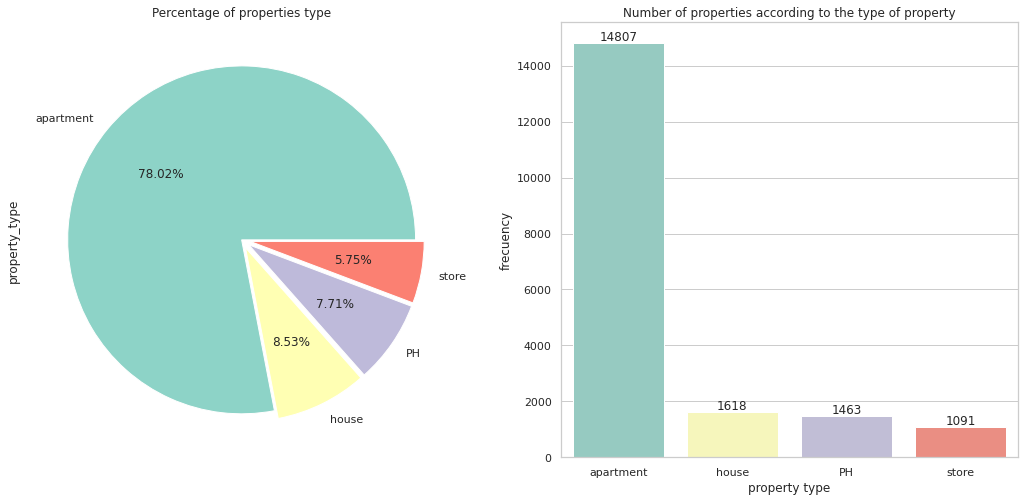

In [350]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
df.property_type.value_counts().plot(kind='pie',colors=colors, ax=ax[0], autopct='%1.2f%%', explode=[0,0.05, 0.05, 0.05])
ax[0].set_title('Percentage of properties type')
sns.countplot(x="property_type", data=df, palette=palette, ax= ax[1], order = df['property_type'].value_counts().index)
ax[1].set_title('Number of properties according to the type of property')
ax[1].set_xlabel('property type')
ax[1].set_ylabel('frecuency')
for container in ax[1].containers:
    ax[1].bar_label(container);

The graph shows us that the majority of the properties are of the apartment type.

## ❌ Wrong data

The next step is to analyze errors that may exist in the dataset.

### Area

For example, the total area cannot be less than the covered area. If this happens, we can choose to delete those rows or try to correct the problem. Let's first see if this happens.

In [351]:
wrong_surface_rows = df[df.surface_total_in_m2 < df.surface_covered_in_m2]
wrong_surface_rows.head()

created_on operation property_type  \
106  2017-09-07      sell         house   
153  2017-09-12      sell     apartment   
657  2017-10-17      sell     apartment   
935  2017-11-06      sell     apartment   
1174 2017-11-22      sell         house   

                               place_with_parent_names  \
106               |Argentina|Capital Federal|Belgrano|   
153                |Argentina|Capital Federal|Palermo|   
657   |Argentina|Capital Federal|Palermo|Palermo Soho|   
935                |Argentina|Capital Federal|Palermo|   
1174               |Argentina|Capital Federal|Palermo|   

                            lat-lon        lat        lon  price_aprox_usd  \
106           -34.566867,-58.444197 -34.566867 -58.444197        1650000.0   
153         -34.5830704,-58.4241896 -34.583070 -58.424190         140000.0   
657   -34.5827102814,-58.4268853069 -34.582710 -58.426885         307300.0   
935         -34.5869532,-58.4189032 -34.586953 -58.418903         275000.0   
1174          -34.583652,-58.444111 -34.583652 -58.444111         930000.0   

      surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  \
106                 455.0                  456.0       3626.373626    NaN   
153                  39.0                   44.0       3589.743590    NaN   
657                  59.0                   63.0       5208.474576    NaN   
935                  13.0                   79.0      21153.846154    1.0   
1174                205.0                  343.0       4536.585366    NaN   

      rooms  expenses  \
106     5.0       NaN   
153     1.0       NaN   
657     NaN       NaN   
935     4.0       NaN   
1174    5.0       NaN   

                                                                                                                                                                                                                            properati_url  \
106                          https://www.properati.com.ar/1ehbq_venta_casa_belgrano_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_toilette_vestidor_luminoso_lujoso_garage_impecable_subte-linea-d_re-max-win   
153                                                                                                                       https://www.properati.com.ar/1en9l_venta_departamento_palermo_luminoso_estrenar_subte-linea-d_mavia-propiedades   
657   https://www.properati.com.ar/1gyrq_venta_departamento_palermo-soho_baulera_gimnasio_parrilla_piscina_sum_terraza_luminoso_vista_sauna_garage_amoblado_amenities_aire-acondicionado_estrenar_losa-radiante_subte-linea-d_devoto-citi   
935                                                                            https://www.properati.com.ar/1htrv_venta_departamento_palermo_scalabrini-ortiz-av-r-_2300_baulera_patio_toilette_dependencias_garage_bengochea-propiedades   
1174                                                                                                                  https://www.properati.com.ar/1ibt5_venta_casa_palermo_balcon_lavadero_parrilla_patio_terraza_garage_re-max-total-iv   

     neighborhood  comuna  
106       PALERMO    14.0  
153       PALERMO    14.0  
657       PALERMO    14.0  
935       PALERMO    14.0  
1174      PALERMO    14.0

In [352]:
print(len(wrong_surface_rows))

122


We propose not to eliminate these erroneous instances, but to exchange the values of `surface_total_in_m2` for `surface_covered_in_m2` in case the mentioned condition is met.

In [353]:
df.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

### Duplicate coordinates

On the other hand, it happens that real estate agents, when they do not have the real coordinates of the properties, use values that are not correct. For example, the central point of each neighborhood or points of interest such as the Obelisk. This can affect the analysis related to the location of each property.

First let's see if there are repeated coordinates.

In [354]:
point_count = df.groupby(['lat', 'lon']).size()
point_count[point_count > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    160
-34.571150  -58.423297    128
-34.562084  -58.456686     91
-34.620928  -58.445874     49
-34.609821  -58.392606     47
-34.622973  -58.439913     41
-34.608608  -58.448515     40
-34.603771  -58.381587     37
-34.617719  -58.362056     36
-34.621184  -58.373116     33
dtype: int64

For example, in the case of the third point, it can be verified that it corresponds to the corner of Av. Cabildo and Belgrano.
We are then left with the properties with coordinates that are repeated up to 5 times.

In [355]:
point_count.name = 'count'
df = df.join(point_count, on=['lat', 'lon'])
df.head()

created_on operation property_type  \
0 2017-09-22      sell         house   
1 2017-08-01      sell         store   
2 2017-08-02      sell         store   
3 2017-08-03      sell         store   
4 2017-08-08      sell         store   

                             place_with_parent_names  \
0  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1                |Argentina|Capital Federal|Palermo|   
2   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3                |Argentina|Capital Federal|Palermo|   
4           |Argentina|Capital Federal|Barrio Norte|   

                         lat-lon        lat        lon  price_aprox_usd  \
0  -34.5889531469,-58.4298817776 -34.588953 -58.429882        2000000.0   
1          -34.586069,-58.414431 -34.586069 -58.414431         790000.0   
2         -34.589723,-58.4325664 -34.589723 -58.432566         343000.0   
3        -34.5923646,-58.4144028 -34.592365 -58.414403         145000.0   
4   -34.585652875,-58.4114933233 -34.585653 -58.411493         175000.0   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  rooms  \
0                312.0                    NaN       6410.256410    NaN    NaN   
1                121.0                  121.0       6528.925620    NaN    NaN   
2                122.0                  108.0       2811.475410    NaN    2.0   
3                 24.0                   24.0       6041.666667    NaN    NaN   
4                 24.0                   24.0       7291.666667    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                                                                                    properati_url  \
0                                                                               https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba   
1                       https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios   
2  https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades   
3                      https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo   
4                                                          https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j   

  neighborhood  comuna  count  
0      PALERMO    14.0      1  
1      PALERMO    14.0      1  
2      PALERMO    14.0      1  
3      PALERMO    14.0      1  
4      PALERMO    14.0      1

In [356]:
print(df[df['count'] > 5].shape[0])

2547


In [357]:
df_filtered = df[df['count'] <= 5]

In [358]:
del df_filtered['count']

### Coordinates outside CABA

We filter the instances that have coordinates outside of CABA (with GeoPandas). We get the coordinates in the [link](https://data.buenosaires.gob.ar/dataset/barrios/resource/1c3d185b-fdc9-474b-b41b-9bd960a3806e).

In [359]:
neighborhoods_caba = gpd.read_file('data/properati/barrios_caba.geojson')
neighborhoods_caba.drop(columns=['AREA', 'PERIMETRO', 'COMUNA', 'BARRIO'], inplace=True)

In [360]:
neighborhoods_caba.columns

Index(['WKT', 'OBJETO', 'geometry'], dtype='object')

In [361]:
df_filtered = gpd.GeoDataFrame(df_filtered, crs={'init':'epsg:4326'})
df_filtered.geometry = df_filtered.apply(lambda row: Point(row.lon, row.lat), axis=1)

In [362]:
df_filtered = gpd.sjoin(df_filtered, neighborhoods_caba, how='inner', predicate='intersects')

In [363]:
df_filtered.shape

(16432, 21)

In [364]:
df_filtered.columns

Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'neighborhood', 'comuna', 'geometry',
       'index_right', 'WKT', 'OBJETO'],
      dtype='object')

In [365]:
df_filtered.drop(columns=[ 'geometry', 'index_right', 'WKT', 'OBJETO'], inplace=True)

### Duplicate rows

We are going to remove duplicate properties, based on all columns except `created_on`. Real estate agents often republish their properties so that they appear multiple times on the site. Sometimes they do it at different times, in this case the creation date would mean that two table rows that match in the rest of their attributes are not considered the same property, so we don't use it for the comparison.

In [366]:
cols = ['operation',
        'property_type',
        'place_with_parent_names',
        'lat',
        'lon',
        'price_aprox_usd',
        'surface_total_in_m2',
        'surface_covered_in_m2',
        'price_usd_per_m2',
        'floor',
        'rooms']

In [367]:
# Number of duplicated rows
df_filtered[df_filtered.duplicated(subset=cols)].shape

(33, 17)

In [368]:
df_filtered.drop_duplicates(cols, inplace=True)

In [369]:
df_filtered.shape

(16399, 17)

## Studying the neighborhoods

In [370]:
df_filtered.neighborhood.nunique()

48

### Top neighborhoods by the percentage of property_type

By knowing which neighborhoods have more flats for sale and which have more houses, we can get an idea of what kind of neighborhood it is. If it is more residential, with more population, purchasing power, etc. For that we are going to start by calculating the percentages of each type of property according to the neighborhood.

In [371]:
total_properties = df_filtered.groupby('neighborhood').size().reset_index().rename(columns={0: 'total_properties'})
count_df = df_filtered.groupby(['neighborhood', 'property_type']).size().reset_index().rename(columns={0: 'count'})
result = pd.merge(count_df, total_properties, on="neighborhood")
result['percentage'] = result['count']/result['total_properties']

In [372]:
top_apartment = result[result.property_type.isin(['apartment'])].sort_values(by=['percentage'], ascending = False).head()[['neighborhood', 'percentage']]
top_house = result[result.property_type.isin(['house'])].sort_values(by=['percentage'], ascending = False).head()[['neighborhood', 'percentage']]
top_ph = result[result.property_type.isin(['PH'])].sort_values(by=['percentage'], ascending = False).head()[['neighborhood', 'percentage']]
top_store = result[result.property_type.isin(['store'])].sort_values(by=['percentage'], ascending = False).head()[['neighborhood', 'percentage']]

In [373]:
print("Top 5 neighborhoods with the highest percentage of apartments: \n", top_apartment)
print('')
print("Top 5 neighborhoods with the highest percentage of houses: \n ", top_house)
print('')
print("Top 5 neighborhoods with the highest percentage of phs: \n ", top_ph)
print('')
print("Top 5 neighborhoods with the highest percentage of stores: \n ", top_store)

Top 5 neighborhoods with the highest percentage of apartments: 
       neighborhood  percentage
104  PUERTO MADERO    0.971014
108       RECOLETA    0.945245
112         RETIRO    0.882771
81         PALERMO    0.875117
17        BELGRANO    0.874016

Top 5 neighborhoods with the highest percentage of houses: 
          neighborhood  percentage
137        VERSALLES    0.424658
177  VILLA RIACHUELO    0.423077
149     VILLA DEVOTO    0.361564
74     NUEVA POMPEYA    0.352941
2          AGRONOMIA    0.333333

Top 5 neighborhoods with the highest percentage of phs: 
            neighborhood  percentage
175    VILLA RIACHUELO    0.307692
84   PARQUE AVELLANEDA    0.289062
60           MATADEROS    0.262673
88    PARQUE CHACABUCO    0.252475
155       VILLA LUGANO    0.230769

Top 5 neighborhoods with the highest percentage of stores: 
           neighborhood  percentage
67          MONSERRAT    0.177083
126       SAN NICOLAS    0.171657
130         SAN TELMO    0.147208
182  VILLA SANTA RI

To give us an idea of the differences between the percentages of apartments and houses in these neighborhoods, we are going to graph them.

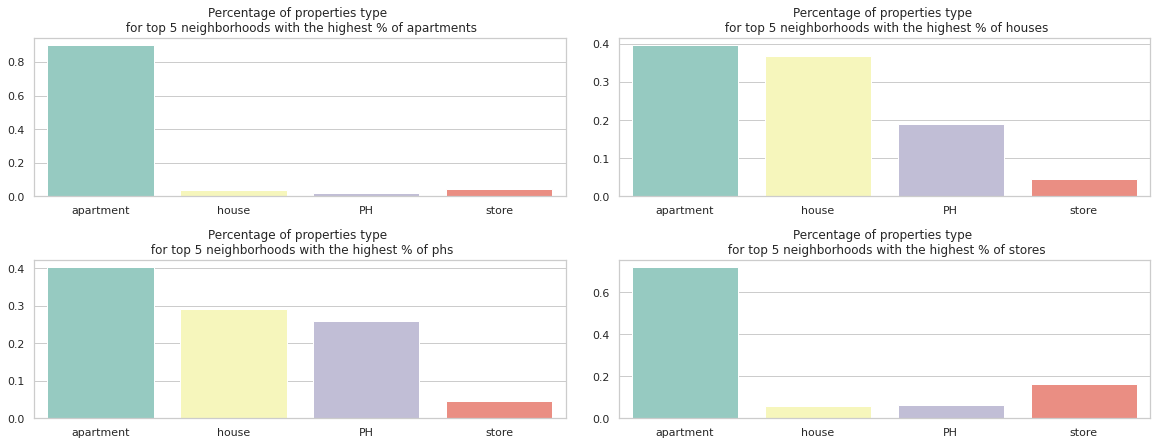

In [374]:
fig, ax = plt.subplots(2,2,figsize=(20,7))
y1 = df_filtered[df_filtered.neighborhood.isin(top_apartment.neighborhood)].property_type.value_counts(normalize=True)
y2 = df_filtered[df_filtered.neighborhood.isin(top_house.neighborhood)].property_type.value_counts(normalize=True)
y3 = df_filtered[df_filtered.neighborhood.isin(top_ph.neighborhood)].property_type.value_counts(normalize=True)
y4 = df_filtered[df_filtered.neighborhood.isin(top_store.neighborhood)].property_type.value_counts(normalize=True)
sns.barplot(y1.index, y1.values, ax=ax[0,0], palette=palette, order=['apartment','house','PH','store'])
sns.barplot(y2.index, y2.values, ax=ax[0,1], palette=palette, order=['apartment','house','PH','store'])
sns.barplot(y3.index, y3.values, ax=ax[1,0], palette=palette, order=['apartment','house','PH','store'])
sns.barplot(y4.index, y4.values, ax=ax[1,1], palette=palette, order=['apartment','house','PH','store'])
ax[0,0].set_title('Percentage of properties type \n for top 5 neighborhoods with the highest % of apartments')
ax[0,1].set_title('Percentage of properties type \n for top 5 neighborhoods with the highest % of houses')
ax[1,0].set_title('Percentage of properties type \n for top 5 neighborhoods with the highest % of phs')
ax[1,1].set_title('Percentage of properties type \n for top 5 neighborhoods with the highest % of stores')
plt.subplots_adjust(hspace=0.4, wspace=0.1);

### Cheapest and most expensive neighborhoods

Let's to graph the neighborhoods according to the price per square meter.

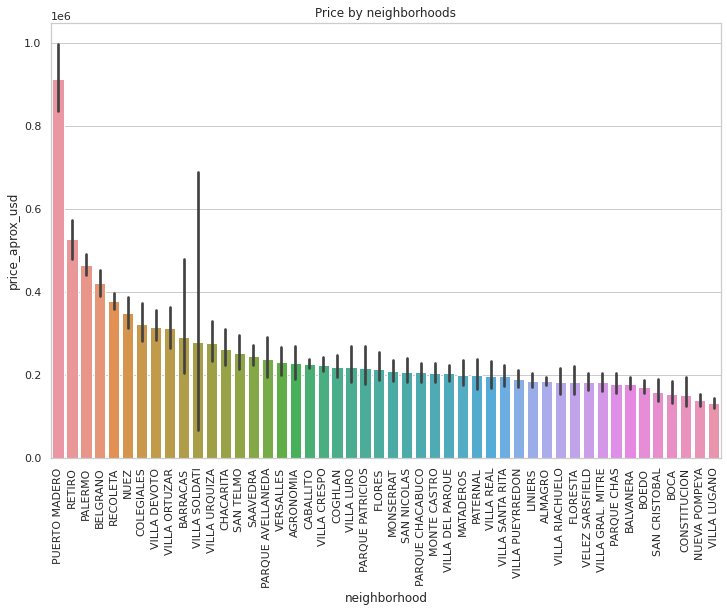

In [375]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
plt.title('Price by neighborhoods')
neighborhoods = df_filtered.groupby('neighborhood').mean().sort_values('price_aprox_usd', ascending=False).index
sns.barplot(x="neighborhood", y="price_aprox_usd", order=neighborhoods, data=df_filtered);

#### Outliers

Let us first analyze the extreme values that may exist in `price_aprox_usd`. This will be useful for imputing later using measures of central tendency, such as the mean. Remember that measures of central tendency can be sensitive to outliers, so the imputation of missing values can be affected.

One possible question that arises is whether to first impute missing values and then remove outliers, or the opposite. When it is imputed, the distribution of the data is modified. Therefore, the bounds that we use to define the outliers will be affected by this change and will modify the final results. So, we'll start by removing the outliers.

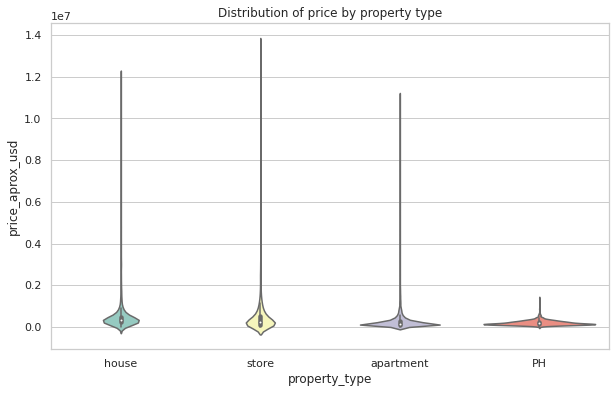

In [376]:
ax = sns.violinplot("property_type", "price_aprox_usd", data = df_filtered, split=True, palette=palette)
ax.set_title('Distribution of price by property type');

In [377]:
df_filtered.groupby(['property_type']).price_aprox_usd.describe()

count           mean            std      min       25%  \
property_type                                                             
PH              1292.0  210611.610472  112891.354582  7648.57  135000.0   
apartment      11513.0  277474.131859  361707.938528  5043.30  115000.0   
house           1374.0  488071.869425  627416.081260  6883.71  230000.0   
store            874.0  454142.159554  694136.611973  6113.09  120000.0   

                    50%       75%         max  
property_type                                  
PH             180000.0  265000.0   1400000.0  
apartment      169000.0  295000.0  11111111.0  
house          340000.0  500000.0  12000000.0  
store          260000.0  547500.0  13500000.0

We can see extreme values on both sides of the distribution. We are going to apply the interquartile range technique to clean them up.

To get the range we have to calculate the difference between the third and first percentile. Then, based on this, we will calculate the minimum and maximum values to define which observations will be discarded.

<img src="img/iq.png" alt="drawing" width="500"/>

In [378]:
df_filtered.shape

(16399, 17)

In [379]:
def remove_outliers(df, column):
        
    Q1 = df[column].dropna().quantile(0.25)
    Q3 = df[column].dropna().quantile(0.75)
    IQR = Q3 - Q1 
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    clean_df = df[(df[column] > minimum) & (df[column] < maximum)]
        
    return clean_df

In [380]:
df_clean = df_filtered.groupby(['property_type', 'neighborhood'])\
                      .apply(lambda x: remove_outliers(x, 'price_aprox_usd'))\
                      .reset_index(drop=True)

In [381]:
df_clean.shape

(14196, 17)

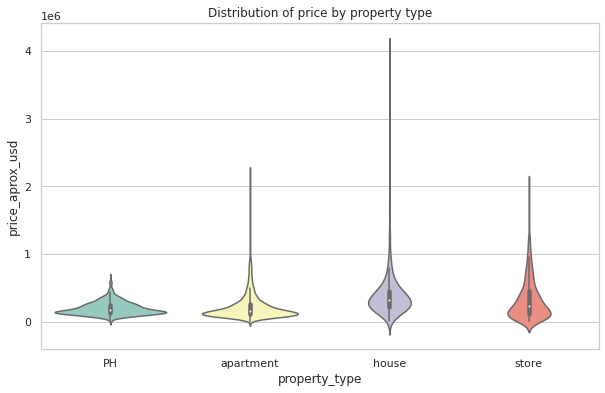

In [382]:
ax = sns.violinplot("property_type", "price_aprox_usd", data = df_clean, split=True, palette=palette)
ax.set_title('Distribution of price by property type');

In [383]:
df_clean.groupby(['property_type']).price_aprox_usd.describe()

count           mean            std      min       25%  \
property_type                                                             
PH              1244.0  202031.190297   97243.164024  7648.57  134000.0   
apartment      10860.0  229829.867842  207082.012258  5043.30  110000.0   
house           1292.0  421258.654481  405256.410963  6883.71  225000.0   
store            800.0  325585.309313  295269.172999  6113.09  110000.0   

                    50%        75%        max  
property_type                                  
PH             176000.0  255916.25   660000.0  
apartment      160000.0  269000.00  2220000.0  
house          320000.0  460750.75  4000000.0  
store          230000.0  450000.00  2000000.0

#### Most expensive neighborhoods

In [384]:
table = pd.pivot_table(df_clean, values='price_aprox_usd', index=['neighborhood'], aggfunc=np.mean)
most_expensive = table.sort_values('price_aprox_usd', ascending=False).iloc[:5]
most_expensive

price_aprox_usd
neighborhood                  
PUERTO MADERO    838415.145749
RETIRO           437006.114061
PALERMO          362775.807749
BELGRANO         310197.917461
RECOLETA         310019.297130

#### Cheapest neighborhoods

In [385]:
table = pd.pivot_table(df_clean, values='price_aprox_usd', index=['neighborhood'], aggfunc=np.mean)
cheapest = table.sort_values('price_aprox_usd', ascending=True).iloc[:5]
cheapest

price_aprox_usd
neighborhood                  
VILLA SOLDATI     72952.357857
BOCA             123549.866063
CONSTITUCION     126634.504123
VILLA LUGANO     127821.410714
NUEVA POMPEYA    130705.010149

### Ploting neighborhood properties

Now that we know which neighborhoods are the most expensive and which are the cheapest, let's look at some graphical comparisons to better understand their differences in the different attributes of the data set. Let's see the distributions according to:

* Total area in $m^{2}$
* Covered area in $m^{2}$
* Number of rooms 
* Price aprox in dollars

In [386]:
most_expensive_neighborhoods = most_expensive.index 
cheapest_neighborhoods = cheapest.index

In [387]:
df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)].shape

(531, 17)

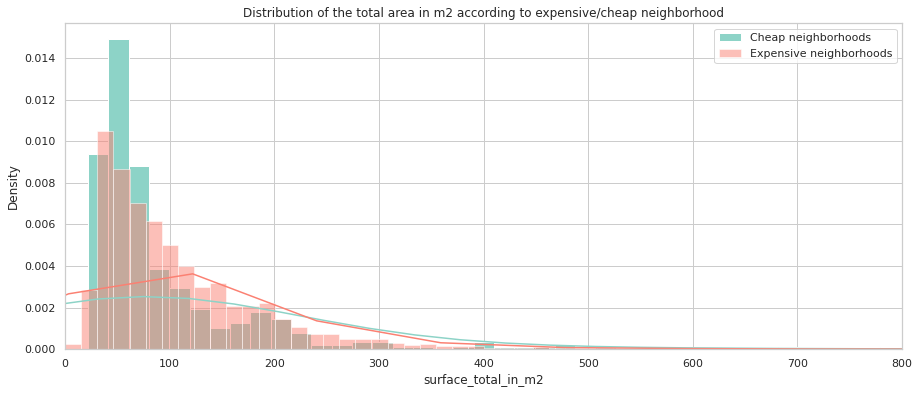

In [388]:
plt.figure(figsize = (15,6))
sns.distplot(df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)].surface_total_in_m2,
             label="Cheap neighborhoods",
             color=colors[0],
             bins=400,
             hist_kws=dict(alpha=1))
sns.distplot(df_clean[df_clean.neighborhood.isin(most_expensive_neighborhoods)].surface_total_in_m2,
             label="Expensive neighborhoods",
             color=colors[3],
             bins=1500,
             hist_kws=dict(alpha=0.5))
plt.xlim(0, 800)
plt.title("Distribution of the total area in m2 according to expensive/cheap neighborhood")
plt.legend(loc='upper right');

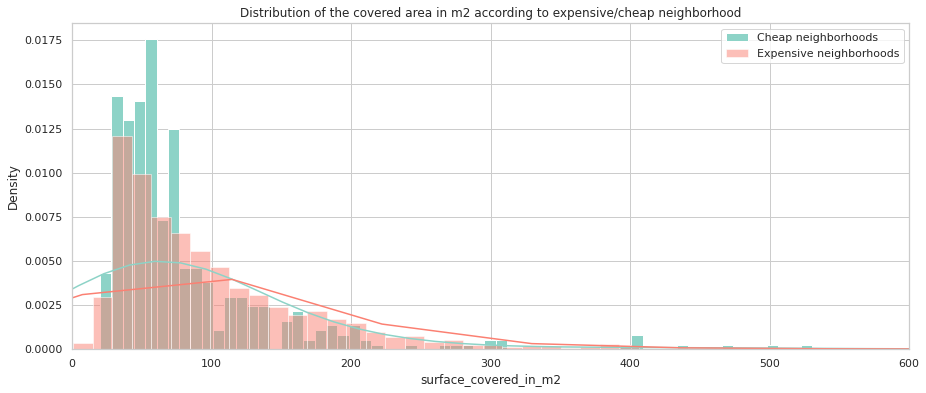

In [389]:
plt.figure(figsize = (15,6))
sns.distplot(df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)].surface_covered_in_m2,
             label="Cheap neighborhoods",
             color=colors[0],
             bins=400,
             hist_kws=dict(alpha=1))
sns.distplot(df_clean[df_clean.neighborhood.isin(most_expensive_neighborhoods)].surface_covered_in_m2,
             label="Expensive neighborhoods",
             color=colors[3],
             bins=1500,
             hist_kws=dict(alpha=0.5))
plt.xlim(0, 600)
plt.title("Distribution of the covered area in m2 according to expensive/cheap neighborhood")
plt.legend(loc='upper right');

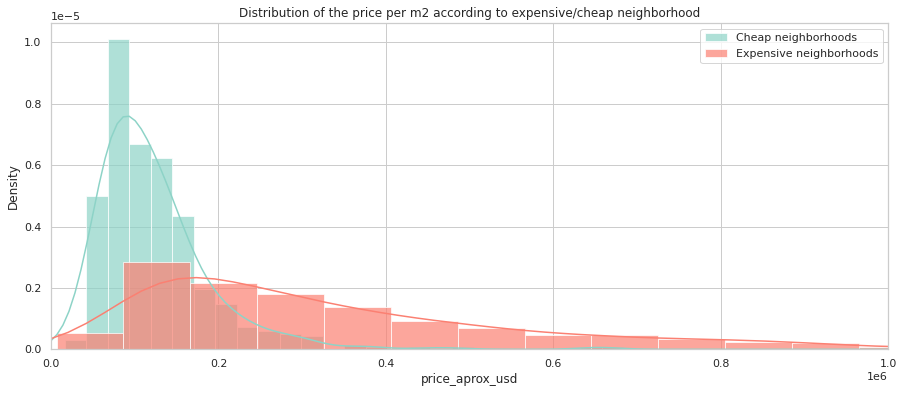

In [390]:
plt.figure(figsize = (15,6))
sns.distplot(df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)].price_aprox_usd,
             label="Cheap neighborhoods",
             color=colors[0],
             hist_kws=dict(alpha=0.7))
sns.distplot(df_clean[df_clean.neighborhood.isin(most_expensive_neighborhoods)].price_aprox_usd,
             label="Expensive neighborhoods",
             color=colors[3],
             hist_kws=dict(alpha=0.7))
plt.title("Distribution of the price per m2 according to expensive/cheap neighborhood")
plt.xlim(0, 1e6)
plt.legend(loc='upper right');

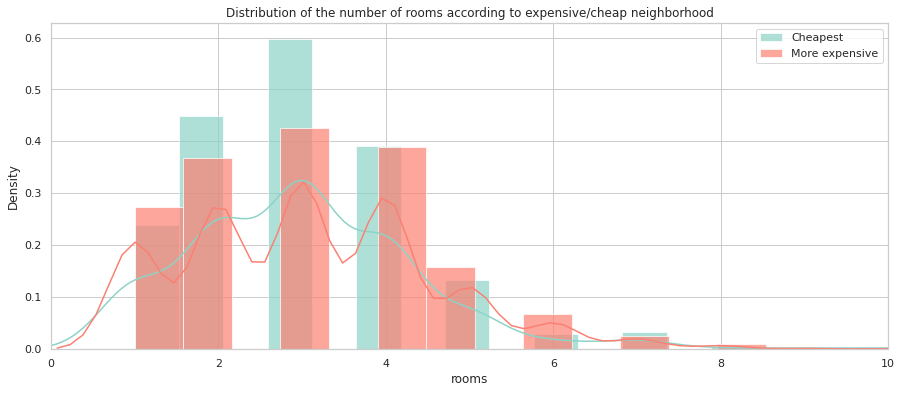

In [391]:
plt.figure(figsize = (15,6))
sns.distplot(df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)].rooms, label="Cheapest", color=colors[0], hist_kws=dict(alpha=0.7))
sns.distplot(df_clean[df_clean.neighborhood.isin(most_expensive_neighborhoods)].rooms, label="More expensive", color=colors[3], hist_kws=dict(alpha=0.7))
plt.xlim(0, 10)
plt.title("Distribution of the number of rooms according to expensive/cheap neighborhood")
plt.legend(loc='upper right');

### Neighborhoods that want to be others

Based on market information, from the Properati portal they have indicated that real estate agencies usually publish properties located in neighborhoods that do not necessarily correspond to the real geographical location. As mentioned in the note ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), this corresponds to a commercial logic in the northern corridor and uses and customs in the west zone.

Let's analyze what happens with our data set.

Given the structure of the `place_with_parent_names` attribute, we will first extract the field associated with the published neighborhood in order to compare it with the one from the official cartography. We are going to add this in a new column called `published_neighborhood`. 

In this way, we are going to analyze how the columns `neighborhood` and `published neighborhood` are related. If there are indeed neighborhoods that want to be other, we would expect to see properties geographically located in a different neighborhood than the one stated in the publication. For example, if a property is located (given its coordinates) in Villa Crespo but in the publication it says Palermo, then we can deduce that there are indications that Villa Crespo wants to be Palermo.

Looking at the structure of this attribute, we can notice that it is composed by a sequence of places separated by `|`. For example, in `|Argentina|Capital Federal|Palermo|` we see that the first value is the country, then the city, then the neighborhood and in some cases there is one more hierarchy, related to areas within the neighborhood (such as Palermo Soho within Palermo). 

Thus, a possible strategy to solve this is to separate the hierarchies by `|` and extract the element associated to the neighborhood. For example, for `|Argentina|Capital Federal|Palermo|` we get `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. By extracting the third element we will obtain the neighborhood regardless of whether there are places later in the hierarchy. Those that do not have a neighborhood will not be considered since they would be located in Capital Federal and would not be informative.

We change it to capital letters and remove the accents to be able to compare with the official neighborhood.

In [392]:
df_clean['place_with_parent_names'].sample(5)

6157           |Argentina|Capital Federal|Palermo|
13246       |Argentina|Capital Federal|Villa Luro|
1707           |Argentina|Capital Federal|Almagro|
11900    |Argentina|Capital Federal|Villa Urquiza|
6398          |Argentina|Capital Federal|Belgrano|
Name: place_with_parent_names, dtype: object

In [393]:
df_clean['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([5, 6, 4])

In [394]:
# Those of length 4 are not informative, so we remove them.
no_neighborhood = df_clean.loc[df_clean['place_with_parent_names'].apply(lambda x: len(x.split("|"))==4)]
print('Number of properties without neighborhood: {}'.format(len(no_neighborhood)))

Number of properties without neighborhood: 18


In [395]:
split_place_filter = df_clean['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_clean = df_clean.loc[split_place_filter]

In [396]:
df_clean['published_neighborhood'] = df_clean['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_clean['published_neighborhood'] = df_clean['published_neighborhood'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Let's compare then the published neighborhood with the real one. We are going to keep those properties where they do not match and then count them by neighborhood.

In [397]:
neighborhoods_match = (df_clean['published_neighborhood'] != df_clean['neighborhood'])
df_neighborhoods_not_match = df_clean.loc[neighborhoods_match]
df_neighborhoods_not_match.head()

created_on operation property_type  \
3  2017-10-29      sell            PH   
6  2018-01-19      sell            PH   
8  2017-09-03      sell            PH   
23 2017-10-17      sell            PH   
31 2017-10-17      sell            PH   

                          place_with_parent_names  \
3        |Argentina|Capital Federal|Villa Devoto|   
6    |Argentina|Capital Federal|Villa del Parque|   
8         |Argentina|Capital Federal|San Nicolás|   
23          |Argentina|Capital Federal|Balvanera|   
31  |Argentina|Capital Federal|Parque Centenario|   

                          lat-lon        lat        lon  price_aprox_usd  \
3            -34.59501,-58.499601 -34.595010 -58.499601         310000.0   
6   -34.5953620723,-58.4949399878 -34.595362 -58.494940         185000.0   
8         -34.6058824,-58.4217798 -34.605882 -58.421780         137900.0   
23        -34.6159286,-58.4230292 -34.615929 -58.423029         174000.0   
31         -34.6087313,-58.427735 -34.608731 -58.427735          79000.0   

    surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  \
3                 157.0                  150.0       1974.522293    NaN   
6                  97.0                   82.0       1907.216495    NaN   
8                  76.0                   64.0       1814.473684    NaN   
23                122.0                   90.0       1426.229508    NaN   
31                 64.0                   46.0       1234.375000    NaN   

    rooms  expenses  \
3     4.0       NaN   
6     3.0       NaN   
8     NaN       NaN   
23    NaN       NaN   
31    NaN     300.0   

                                                                                                                                          properati_url  \
3                                               https://www.properati.com.ar/1hlep_venta_ph_villa-devoto_patio_toilette_garage_impecable_re-max-total-v   
6   https://www.properati.com.ar/1jqlm_venta_ph_villa-del-parque_suite_lavadero_terraza_impecable_placard_cattelani-e-hijas-servicios-inmobiliarios_fqh   
8                                https://www.properati.com.ar/1ea75_venta_ph_san-nicolas_terraza_luminoso_subte-linea-b_subte-linea-a_mcm-bienes-raices   
23   https://www.properati.com.ar/1geba_venta_ph_balvanera_suite_hidromasaje_parrilla_terraza_toilette_luminoso_garage_subte-linea-a_torres-propiedades   
31                                      https://www.properati.com.ar/1gwee_venta_ph_parque-centenario_parrilla_terraza_subte-linea-a_yurgel-propiedades   

   neighborhood  comuna published_neighborhood  
3     AGRONOMIA    15.0           VILLA DEVOTO  
6     AGRONOMIA    15.0       VILLA DEL PARQUE  
8       ALMAGRO     5.0            SAN NICOLAS  
23      ALMAGRO     5.0              BALVANERA  
31      ALMAGRO     5.0      PARQUE CENTENARIO

In [398]:
print('Number of properties where the published neighborhood and the real one do not match: {}'.format(len(df_neighborhoods_not_match)))

Number of properties where the published neighborhood and the real one do not match: 4259


With a double-entry table, we can identify for each neighborhood which neighborhood it most wants to be.

In [399]:
table = pd.crosstab(df_neighborhoods_not_match.neighborhood, df_neighborhoods_not_match.published_neighborhood)
table.idxmax(axis=1)

neighborhood
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                         CABALLITO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                    PARQUE PATRICIOS
CABALLITO               PARQUE CENTENARIO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                        VILLA LURO
MATADEROS                         LINIERS
MONSERRAT                       SAN TELMO
MONTE CASTRO                     FLORESTA
NUEVA POMPEYA                     POMPEYA
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS          

We can see that neighborhoods tend to want to resemble neighborhoods with more expensive prices per square meter. For example, Villa Crespo with Palermo, Constitución with San Telmo and Villa Urquiza with Belgrano. 

On the other hand, we also see that neighborhoods tend to want to resemble their neighboring neighborhoods.

In [400]:
# We create a variable with the condition if the published neighborhood is the correct one.
df_clean['neighborhood_match'] = np.where(df_clean['neighborhood'] == df_clean['published_neighborhood'], 1, 0)

## 🧹 Outliers

### Rooms

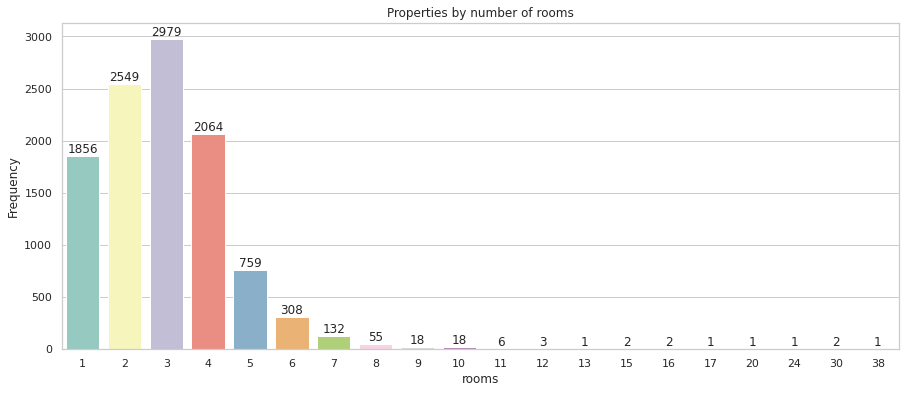

In [401]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = 'rooms', data = df_clean, palette=palette)
plt.ylabel('Frequency')
plt.title('Properties by number of rooms')
labels = ['%.0f' % float(t.get_text()) for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.bar_label(ax.containers[0]);

In [402]:
df_clean.groupby(['property_type']).rooms.describe()

count      mean       std  min  25%  50%  75%   max
property_type                                                      
PH              996.0  3.727912  1.425279  1.0  3.0  3.0  4.0  15.0
apartment      8910.0  2.730303  1.338069  1.0  2.0  3.0  4.0  17.0
house           756.0  4.568783  2.075854  1.0  3.0  4.0  6.0  30.0
store            96.0  3.520833  6.100870  1.0  1.0  1.0  3.0  38.0

In [403]:
df_clean = df_clean[df_clean.rooms <= 10]

In [404]:
df_clean.shape

(10738, 19)

### Surface

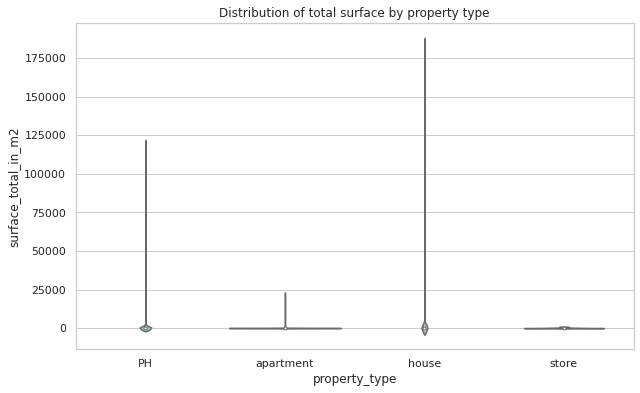

In [405]:
ax = sns.violinplot("property_type", "surface_total_in_m2", data = df_clean, split=True, palette=palette)
ax.set_title('Distribution of total surface by property type');

Let's apply the interquartile range technique to eliminate the outliers of the attribute `surface_total_in_m2`.

In [406]:
df_clean = df_clean.groupby(['property_type', 'neighborhood']).apply(lambda x: remove_outliers(x, 'surface_total_in_m2')).reset_index(drop=True)

In [407]:
df_clean.shape

(9697, 19)

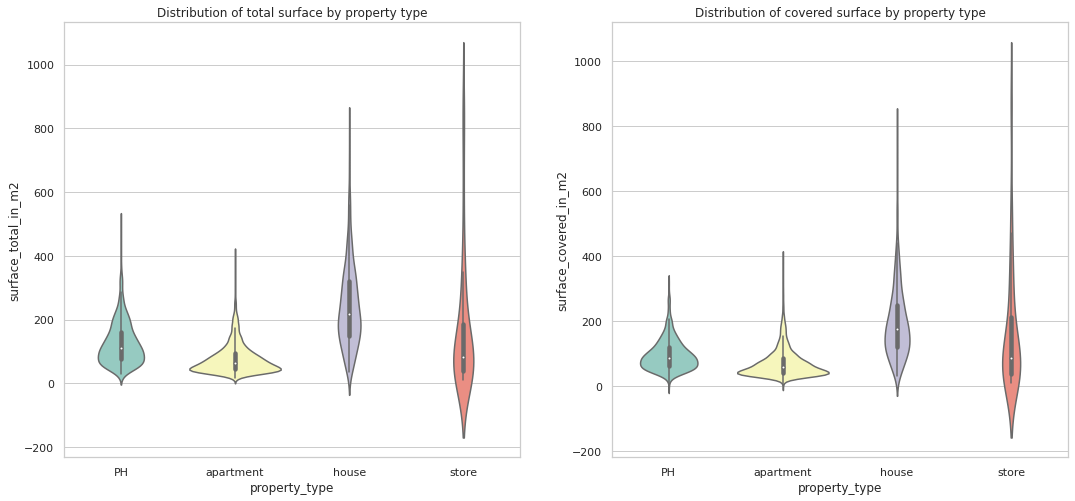

In [408]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("property_type", "surface_total_in_m2", data = df_clean, ax = ax[0], split=True, palette=palette)
sns.violinplot("property_type", "surface_covered_in_m2", data = df_clean, ax = ax[1], split=True, palette=palette)
ax[0].set_title('Distribution of total surface by property type')
ax[1].set_title('Distribution of covered surface by property type');

## Missing values

We will try to impute the missing values for the attributes that we consider important for the real estate market. 

Let's first look at how many missing values each attribute has. We are interested in seeing this as a percentage in relation to the number of observations. If an attribute has a high percentage of missing values, it may be better not to consider it in the analysis.

In [409]:
# Attributes with missing values
df_clean.columns[df_clean.isna().any()].tolist() 

['surface_covered_in_m2', 'floor', 'expenses']

In [410]:
df_clean.isna().sum().sort_values(ascending= False)

floor                      8178
expenses                   7557
surface_covered_in_m2       284
price_usd_per_m2              0
published_neighborhood        0
comuna                        0
neighborhood                  0
properati_url                 0
rooms                         0
created_on                    0
operation                     0
surface_total_in_m2           0
price_aprox_usd               0
lon                           0
lat                           0
lat-lon                       0
place_with_parent_names       0
property_type                 0
neighborhood_match            0
dtype: int64

In [411]:
(df_clean.isna().sum()/df_clean.shape[0]*100).sort_values(ascending= False)

floor                      84.335361
expenses                   77.931319
surface_covered_in_m2       2.928741
price_usd_per_m2            0.000000
published_neighborhood      0.000000
comuna                      0.000000
neighborhood                0.000000
properati_url               0.000000
rooms                       0.000000
created_on                  0.000000
operation                   0.000000
surface_total_in_m2         0.000000
price_aprox_usd             0.000000
lon                         0.000000
lat                         0.000000
lat-lon                     0.000000
place_with_parent_names     0.000000
property_type               0.000000
neighborhood_match          0.000000
dtype: float64

We can see from the results that the `floor` and `expenses` attributes have a high percentage of missing.  

In [412]:
df_clean.loc[df_clean['expenses'].notnull()].property_type.value_counts()

apartment    2046
PH             66
store          25
house           3
Name: property_type, dtype: int64

In [413]:
df_clean = df_clean.drop(['floor', 'expenses'], axis = 1)

Let's impute the missing observations from the `surface_covered_in_m2` column using the mean.

In [414]:
df_clean['surface_covered_in_m2'] = df_clean['surface_covered_in_m2'].fillna(df_clean.groupby(['property_type', 'neighborhood', 'rooms'])['surface_covered_in_m2']\
                                                                     .transform('mean'))

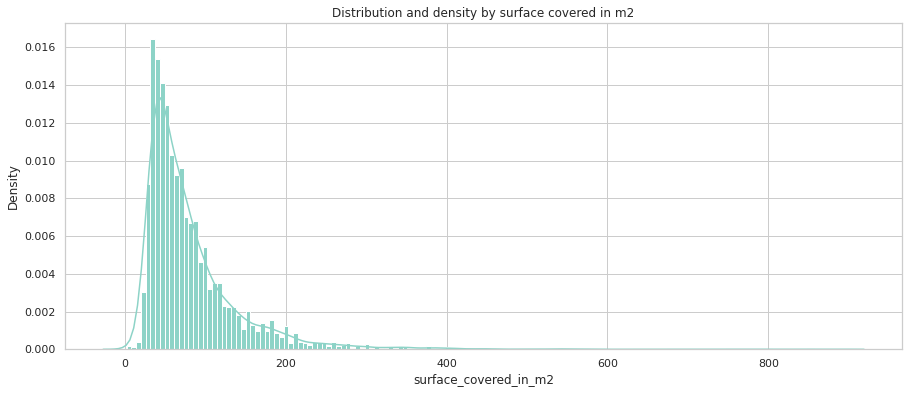

In [415]:
plt.figure(figsize = (15,6))
sns.distplot(df_clean['surface_covered_in_m2'], bins=150, color=colors[0], hist_kws=dict(alpha=1))
plt.ylabel("Density")
plt.title("Distribution and density by surface covered in m2");

We were unable to impute the missing values in the following properties as they are unique in terms of their neighborhood, room and property type values.

In [416]:
len(df_clean[df_clean.isna().any(axis=1)])

10

We could not impute the missing values in the some properties, as they are unique in terms of their neighborhood values, number of rooms and property type. We will impute the nan values in these cases with the average area of the properties but taking into account fewer attributes when grouping.

In [417]:
df_clean['surface_covered_in_m2'] = df_clean['surface_covered_in_m2'].fillna(df_clean.groupby(['property_type', 'neighborhood'])['surface_covered_in_m2']\
                                                                     .transform('mean'))

In [418]:
# We check that we have no more nan
df_clean.columns[df_clean.isna().any()]

Index([], dtype='object')

## Inspecting price against variables of interest

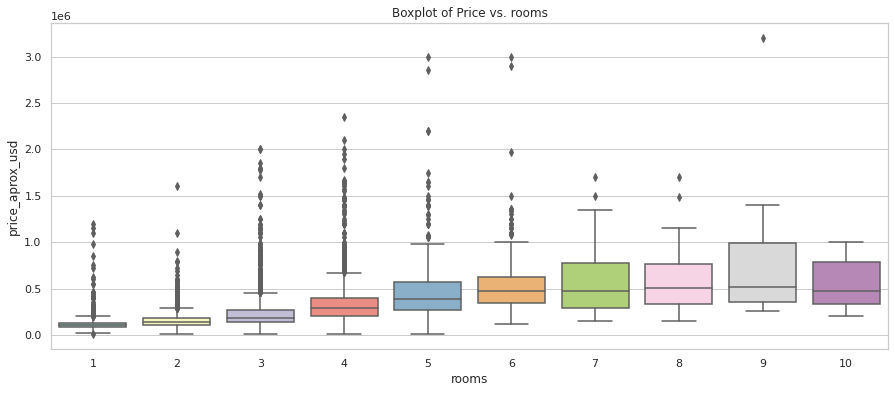

In [419]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x = "rooms", y='price_aprox_usd', data = df_clean, palette=palette)
labels = ['%.0f' % float(t.get_text()) for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("Boxplot of Price vs. rooms");

From the above graph we can see that the more rooms the property has, the higher the price.

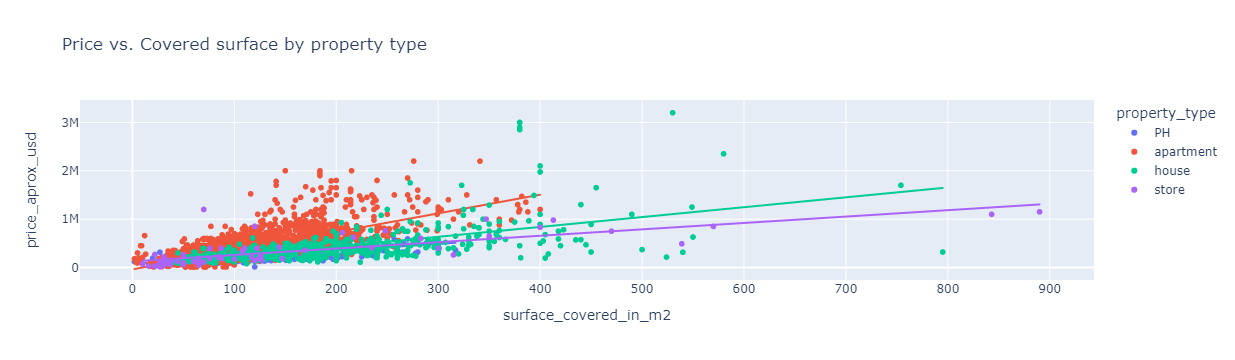

In [420]:
fig = px.scatter(df_clean,
                 x="surface_covered_in_m2",
                 y="price_aprox_usd",
                 color="property_type", 
                 trendline="ols",
                 title="Price vs. Covered surface by property type")
fig.show()

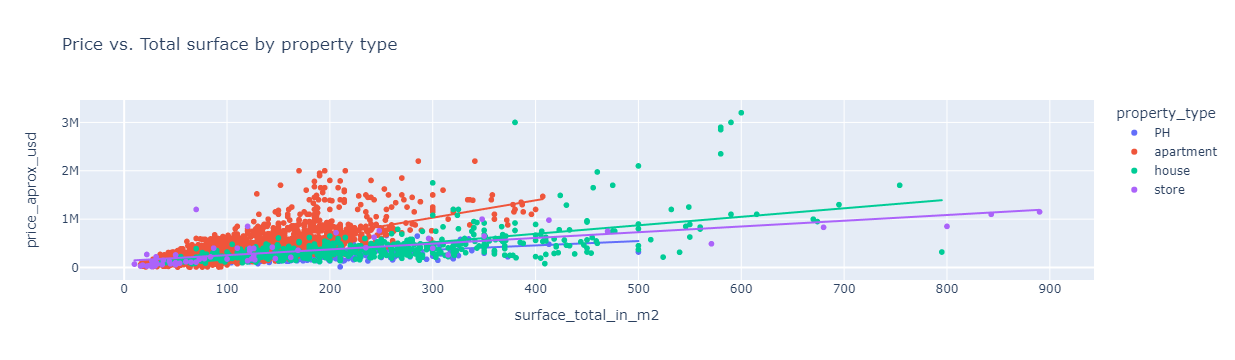

In [421]:
fig = px.scatter(df_clean, 
                 x="surface_total_in_m2", 
                 y="price_aprox_usd", 
                 color="property_type", 
                 trendline="ols",
                 title="Price vs. Total surface by property type")
fig.show()

From the above scaterplot we can observe that the larger the area of the property the higher its price. However, this relationship is more or less evident according to the type of property.

Let's see what happens if we disaggregate by neighborhood.

In [422]:
top_cheap_df = df_clean[df_clean.neighborhood.isin(cheapest_neighborhoods)]
top_expensive_df = df_clean[df_clean.neighborhood.isin(most_expensive_neighborhoods)]

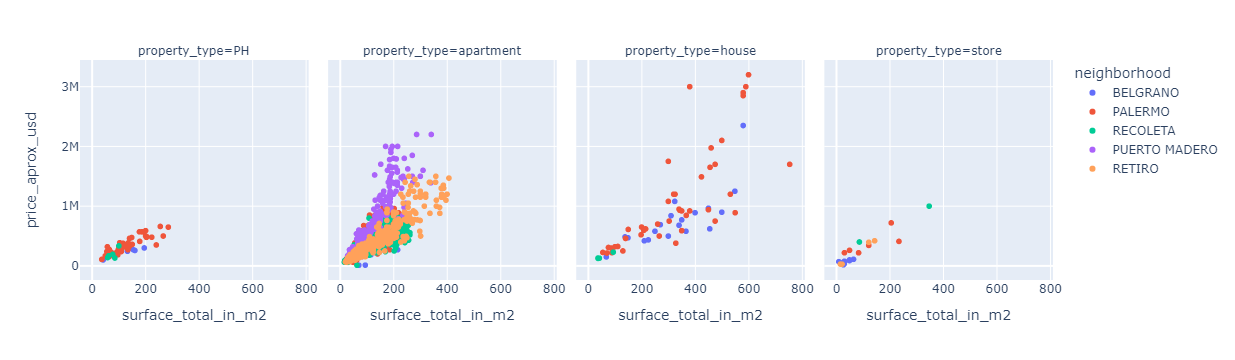

In [423]:
fig = px.scatter(top_expensive_df, x="surface_total_in_m2", y="price_aprox_usd", facet_col="property_type", color='neighborhood')
fig.show()

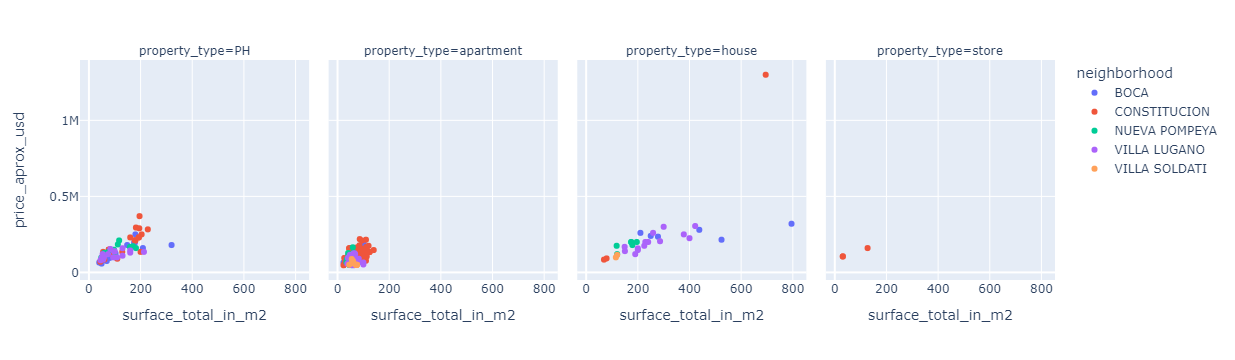

In [424]:
fig = px.scatter(top_cheap_df, x="surface_total_in_m2", y="price_aprox_usd", facet_col="property_type", color='neighborhood')
fig.show()

### Using heat maps to understand the price distribution with location

In [425]:
ba_coords = [-34.6083, -58.3712]
folium_hmap = folium.Map(location=ba_coords, zoom_start=12, tiles="OpenStreetMap")
my_zip = zip(df_clean['lat'], df_clean['lon'], df_clean['price_aprox_usd'])
list_of_my_zip = list(my_zip)
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )
folium_hmap.add_child(hm_layer)
folium_hmap

### Property price over the time

Plot average property price across all locations as a time series.

In [426]:
df_means = df_clean.groupby(['created_on', 'property_type'])['price_aprox_usd'].mean().reset_index()
df_means.head()

created_on property_type  price_aprox_usd
0 2017-08-01         store         355000.0
1 2017-08-02         store         343000.0
2 2017-08-11         store         144950.0
3 2017-08-15         store         220000.0
4 2017-08-16         store         125000.0

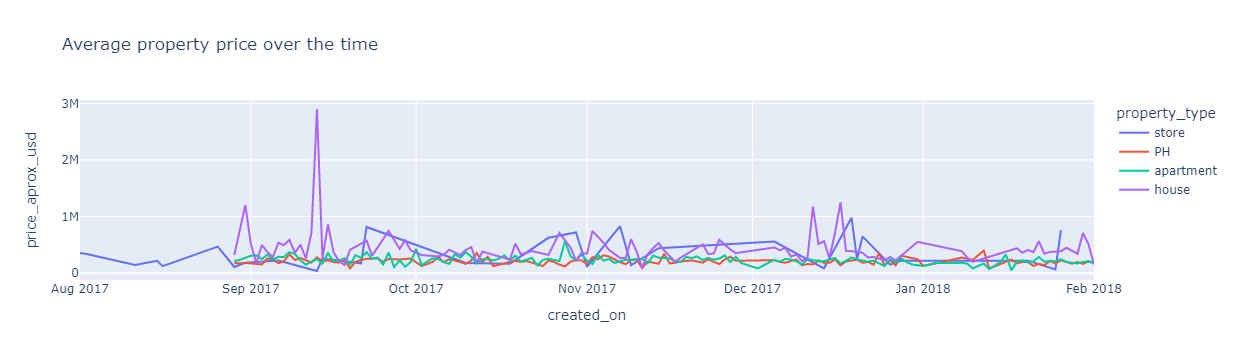

In [427]:
fig = px.line(df_means, x='created_on', y='price_aprox_usd', color='property_type', title="Average property price over the time")
fig.show()

In the graph we see that there was a price increase in houses in September 2017. On the other hand ph and apartments remained more stable over time.

## ⚒️ Feature Engineering

### Adding new attribute

In [428]:
df_clean['year'] = pd.DatetimeIndex(df_clean['created_on']).year
#df_clean['month'] = pd.DatetimeIndex(df_clean['created_on']).month

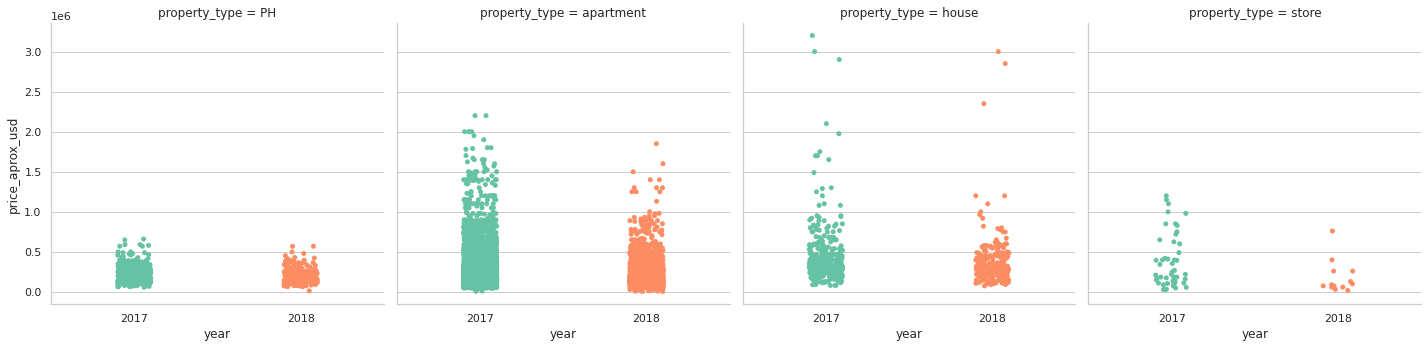

In [429]:
sns.catplot(x="year", y="price_aprox_usd", col="property_type", data=df_clean, palette='Set2');

### Converting String Values into Numeric

In [430]:
df_clean['year'].replace([2017, 2018], [0,1], inplace=True)

We generate binary variables for the attribute `property_type` and `neighborhood`. Note that in both cases the attribute is categorical. 

We convert the variables `property_type` and `neighborhood` using the `Lab encoder`. Then with `OneHotEncoder` we obtain the categories expressed as binary variables. 

Then we'll join the new dataframe `categorical_df` with the filtered dataframe `df_clean`. For this, we need them to have the same index.

In [431]:
def ohe(column):
    
    le = LabelEncoder()
    integer_encoded = le.fit_transform(column)
    ohe = OneHotEncoder(sparse = False)
    integer_encoded = integer_encoded.reshape (len(integer_encoded), 1)
    one_hot_encoded = ohe.fit_transform(integer_encoded)
    categoricals_df = pd.DataFrame(one_hot_encoded)
    categoricals_df.columns = list(le.classes_)
    categoricals_df = categoricals_df.set_index(df_clean.index)
    
    return categoricals_df

In [432]:
property_type_ohe = ohe(df_clean.property_type)
property_type_ohe.head()

PH  apartment  house  store
0  1.0        0.0    0.0    0.0
1  1.0        0.0    0.0    0.0
2  1.0        0.0    0.0    0.0
3  1.0        0.0    0.0    0.0
4  1.0        0.0    0.0    0.0

In [433]:
barrio_ohe = ohe(df_clean.neighborhood)
barrio_ohe.head()

AGRONOMIA  ALMAGRO  BALVANERA  BARRACAS  BELGRANO  BOCA  BOEDO  CABALLITO  \
0        1.0      0.0        0.0       0.0       0.0   0.0    0.0        0.0   
1        1.0      0.0        0.0       0.0       0.0   0.0    0.0        0.0   
2        1.0      0.0        0.0       0.0       0.0   0.0    0.0        0.0   
3        1.0      0.0        0.0       0.0       0.0   0.0    0.0        0.0   
4        1.0      0.0        0.0       0.0       0.0   0.0    0.0        0.0   

   CHACARITA  COGHLAN  COLEGIALES  CONSTITUCION  FLORES  FLORESTA  LINIERS  \
0        0.0      0.0         0.0           0.0     0.0       0.0      0.0   
1        0.0      0.0         0.0           0.0     0.0       0.0      0.0   
2        0.0      0.0         0.0           0.0     0.0       0.0      0.0   
3        0.0      0.0         0.0           0.0     0.0       0.0      0.0   
4        0.0      0.0         0.0           0.0     0.0       0.0      0.0   

   MATADEROS  MONSERRAT  MONTE CASTRO  NUEVA POMPEYA  NUEZ  PALERMO  \
0        0.0        0.0           0.0            0.0   0.0      0.0   
1        0.0        0.0           0.0            0.0   0.0      0.0   
2        0.0        0.0           0.0            0.0   0.0      0.0   
3        0.0        0.0           0.0            0.0   0.0      0.0   
4        0.0        0.0           0.0            0.0   0.0      0.0   

   PARQUE AVELLANEDA  PARQUE CHACABUCO  PARQUE CHAS  PARQUE PATRICIOS  \
0                0.0               0.0          0.0               0.0   
1                0.0               0.0          0.0               0.0   
2                0.0               0.0          0.0               0.0   
3                0.0               0.0          0.0               0.0   
4                0.0               0.0          0.0               0.0   

   PATERNAL  PUERTO MADERO  RECOLETA  RETIRO  SAAVEDRA  SAN CRISTOBAL  \
0       0.0            0.0       0.0     0.0       0.0            0.0   
1       0.0            0.0       0.0     0.0       0.0            0.0   
2       0.0            0.0       0.0     0.0       0.0            0.0   
3       0.0            0.0       0.0     0.0       0.0            0.0   
4       0.0            0.0       0.0     0.0       0.0            0.0   

   SAN NICOLAS  SAN TELMO  VELEZ SARSFIELD  VERSALLES  VILLA CRESPO  \
0          0.0        0.0              0.0        0.0           0.0   
1          0.0        0.0              0.0        0.0           0.0   
2          0.0        0.0              0.0        0.0           0.0   
3          0.0        0.0              0.0        0.0           0.0   
4          0.0        0.0              0.0        0.0           0.0   

   VILLA DEL PARQUE  VILLA DEVOTO  VILLA GRAL. MITRE  VILLA LUGANO  \
0               0.0           0.0                0.0           0.0   
1               0.0           0.0                0.0           0.0   
2               0.0           0.0                0.0           0.0   
3               0.0           0.0                0.0           0.0   
4               0.0           0.0                0.0           0.0   

   VILLA LURO  VILLA ORTUZAR  VILLA PUEYRREDON  VILLA REAL  VILLA RIACHUELO  \
0         0.0            0.0               0.0         0.0              0.0   
1         0.0            0.0               0.0         0.0              0.0   
2         0.0            0.0               0.0         0.0              0.0   
3         0.0            0.0               0.0         0.0              0.0   
4         0.0            0.0               0.0         0.0              0.0   

   VILLA SANTA RITA  VILLA SOLDATI  VILLA URQUIZA  
0               0.0            0.0            0.0  
1               0.0            0.0            0.0  
2               0.0            0.0            0.0  
3               0.0            0.0            0.0  
4               0.0            0.0            0.0

In [434]:
df = pd.concat([df_clean, property_type_ohe, barrio_ohe], axis=1)
df.head()

created_on operation property_type  \
0 2017-09-08      sell            PH   
1 2017-10-04      sell            PH   
2 2017-10-29      sell            PH   
3 2017-11-10      sell            PH   
4 2017-11-17      sell            PH   

                    place_with_parent_names                  lat-lon  \
0     |Argentina|Capital Federal|Agronomía|    -34.589972,-58.495662   
1     |Argentina|Capital Federal|Agronomía|   -34.589695,-58.4859157   
2  |Argentina|Capital Federal|Villa Devoto|     -34.59501,-58.499601   
3     |Argentina|Capital Federal|Agronomía|  -34.5908045,-58.4874557   
4     |Argentina|Capital Federal|Agronomía|  -34.5982971,-58.4783462   

         lat        lon  price_aprox_usd  surface_total_in_m2  \
0 -34.589972 -58.495662         415000.0                186.0   
1 -34.589695 -58.485916         250000.0                117.0   
2 -34.595010 -58.499601         310000.0                157.0   
3 -34.590804 -58.487456         284900.0                189.0   
4 -34.598297 -58.478346         185000.0                218.0   

   surface_covered_in_m2  price_usd_per_m2  rooms  \
0                  135.0       2231.182796    4.0   
1                   80.0       2136.752137    4.0   
2                  150.0       1974.522293    4.0   
3                  129.0       1507.407407    3.0   
4                   95.0        848.623853    3.0   

                                                                                                                                                   properati_url  \
0  https://www.properati.com.ar/1eivv_venta_ph_agronomia_suite_hidromasaje_lavadero_parrilla_patio_terraza_toilette_luminoso_vista_garage_placard_re-max-avenida   
1                                                              https://www.properati.com.ar/1fr6m_venta_ph_agronomia_patio_quincho_terraza_hakim-propiedades_hlb   
2                                                        https://www.properati.com.ar/1hlep_venta_ph_villa-devoto_patio_toilette_garage_impecable_re-max-total-v   
3           https://www.properati.com.ar/1i0pf_venta_ph_agronomia_baulera_jardin_lavadero_patio_terraza_toilette_garage_placard_apto-credito-hipotecario_le-bleu   
4                    https://www.properati.com.ar/1i7ch_venta_ph_agronomia_jardin_lavadero_parrilla_terraza_toilette_luminoso_garage_karina-enriquez-propiedades   

  neighborhood  comuna published_neighborhood  neighborhood_match  year   PH  \
0    AGRONOMIA    15.0              AGRONOMIA                   1     0  1.0   
1    AGRONOMIA    15.0              AGRONOMIA                   1     0  1.0   
2    AGRONOMIA    15.0           VILLA DEVOTO                   0     0  1.0   
3    AGRONOMIA    15.0              AGRONOMIA                   1     0  1.0   
4    AGRONOMIA    15.0              AGRONOMIA                   1     0  1.0   

   apartment  house  store  AGRONOMIA  ALMAGRO  BALVANERA  BARRACAS  BELGRANO  \
0        0.0    0.0    0.0        1.0      0.0        0.0       0.0       0.0   
1        0.0    0.0    0.0        1.0      0.0        0.0       0.0       0.0   
2        0.0    0.0    0.0        1.0      0.0        0.0       0.0       0.0   
3        0.0    0.0    0.0        1.0      0.0        0.0       0.0       0.0   
4        0.0    0.0    0.0        1.0      0.0        0.0       0.0       0.0   

   BOCA  BOEDO  CABALLITO  CHACARITA  COGHLAN  COLEGIALES  CONSTITUCION  \
0   0.0    0.0        0.0        0.0      0.0         0.0           0.0   
1   0.0    0.0        0.0        0.0      0.0         0.0           0.0   
2   0.0    0.0        0.0        0.0      0.0         0.0           0.0   
3   0.0    0.0        0.0        0.0      0.0         0.0           0.0   
4   0.0    0.0        0.0        0.0      0.0         0.0           0.0   

   FLORES  FLORESTA  LINIERS  MATADEROS  MONSERRAT  MONTE CASTRO  \
0     0.0       0.0      0.0        0.0        0.0           0.0   
1     0.0       0.0      0.0        0.0        0.0           0.0   
2     0.0 

### Investigating correlations

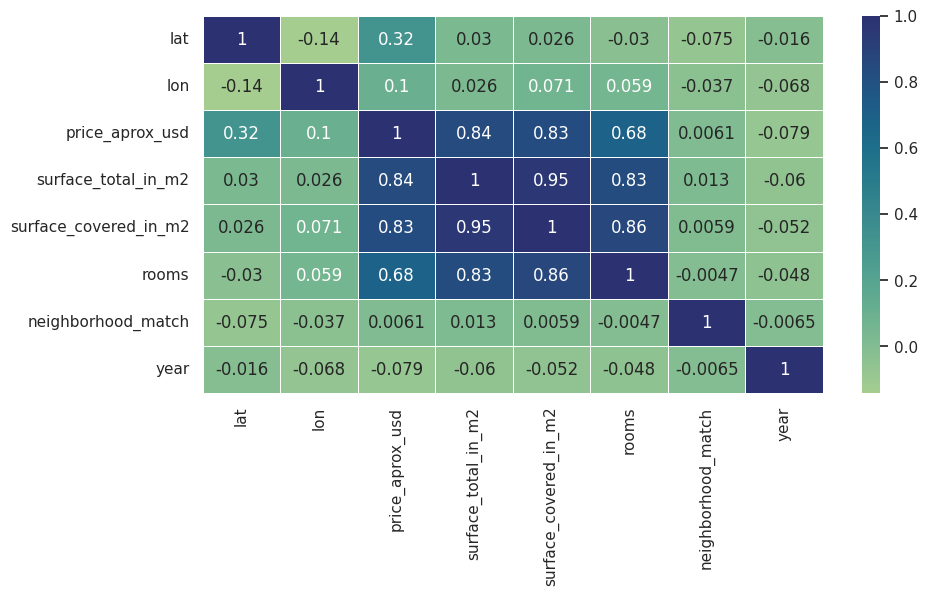

In [436]:
# Plotting the heatmap of the correlation values
cmap = 'crest'
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(df[['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'neighborhood_match', 'year']].corr('spearman'),
            linewidths=.5,
            cmap=cmap,
            annot=True);

### Dropping unneeded attributes

In [437]:
df = df.drop(['created_on', 'operation', 'property_type', 'place_with_parent_names','lat-lon', 'price_usd_per_m2',
              'properati_url', 'neighborhood', 'comuna', 'published_neighborhood'], axis = 1)

## Split X & y

In [438]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

## Split train & test

We separate the data set into a training set (80%) and a test set (20%).

In [468]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(7757, 59) (1940, 59)


## Metric

Our goal now is to assemble our first models to predict the price of properties in dollars.

The metric we are going to use to evaluate the performance of the models is the RMSE (root mean square error), whose formula is:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

## 📈 Regression Models

* Linear Regression
* Decision Tree
* KNN
* Random Forest

### Linear Regression

We first trained a linear regression model as a benchmark.

In [469]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train = round(rmse_train)
rmse_test = round(rmse_test)

print(f'RMSE for Linear Regression - Train: {rmse_train}')
print(f'MSE for Linear Regression - Test: {rmse_test}')

RMSE for Linear Regression - Train: 108439
MSE for Linear Regression - Test: 119931


### KNN

In [472]:
rmses_train = []
rmses_test = []

for x in range(1,30):
    
    knn_reg = KNeighborsRegressor(n_neighbors = x)
    knn_reg.fit(X_train, y_train)
    y_pred_test = knn_reg.predict(X_test)
    y_pred_train = knn_reg.predict(X_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmses_test.append(round(rmse_test))
    rmses_train.append(round(rmse_train))
    
print ('rmses_train =', rmses_train)
print ()
print ('rmses_test=', rmses_test)

rmses_train = [1188, 86671, 103463, 109738, 116374, 119508, 121633, 122916, 124693, 126524, 127372, 127817, 128365, 128820, 129331, 130424, 130992, 131343, 131791, 132054, 132476, 132709, 133088, 133467, 133843, 134160, 134371, 134722, 134721]

rmses_test= [155648, 149808, 154798, 150660, 152226, 150298, 151155, 152154, 152373, 152664, 152472, 153713, 153115, 152956, 153120, 153611, 153620, 153692, 153978, 154338, 155272, 155525, 155118, 154920, 155255, 155539, 155429, 155475, 155260]


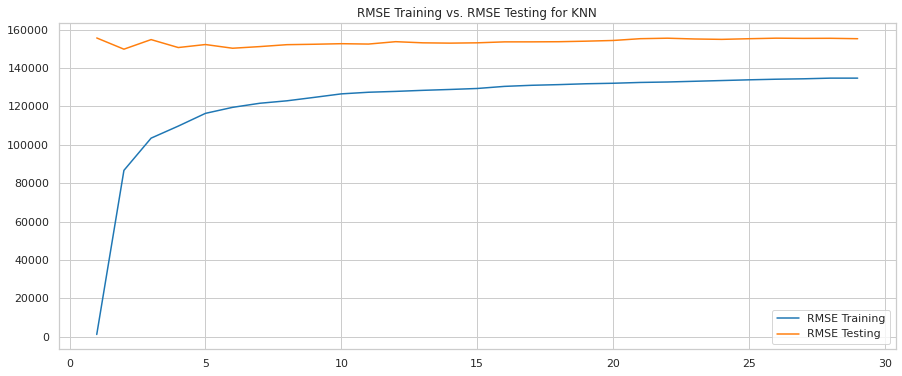

In [473]:
n_neighbors_list = range(1,30, 1)
plt.figure(figsize = (15,6))
plt.plot(n_neighbors_list, rmses_train, label='RMSE Training')
plt.plot(n_neighbors_list, rmses_test, label='RMSE Testing')
plt.legend(loc="best")
plt.title("RMSE Training vs. RMSE Testing for KNN");

### Decision Tree

We are going to analyze the change in RMSE as the decision tree gets deeper, both in training and testing.

For this, we iterate on the `max_depth` parameter and observe how this impacts the RMSE. 

In [470]:
rmses_train = []
rmses_test =[]
max_depth_list = range(1,30,1)

for x in max_depth_list:
    
    tree_reg = DecisionTreeRegressor(max_depth = x)
    tree_reg.fit(X_train, y_train)
    y_pred_test = tree_reg.predict(X_test)
    y_pred_train = tree_reg.predict(X_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmses_test.append(round(rmse_test))
    rmses_train.append(round(rmse_train))  
    
print ('rmses_train =', rmses_train)
print ()
print ('rmses_test=', rmses_test)

rmses_train = [168286, 142570, 125456, 105484, 94836, 82512, 74628, 65573, 57481, 50744, 44214, 37502, 31336, 25793, 20775, 16560, 13182, 10270, 8189, 6611, 5362, 4418, 3441, 2756, 2263, 1769, 1280, 1007, 869]

rmses_test= [186578, 151449, 137206, 118337, 108477, 95978, 96300, 97429, 99067, 98493, 97309, 97238, 101244, 104715, 100221, 103254, 104402, 102831, 101953, 100923, 102099, 103259, 102983, 101379, 102974, 101437, 109157, 104430, 103111]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

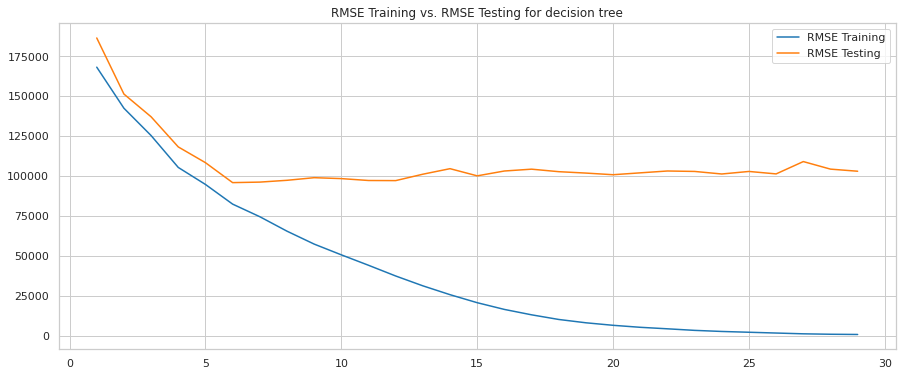

In [471]:
plt.figure(figsize = (15,6))
plt.plot(max_depth_list, rmses_train, label='RMSE Training')
plt.plot(max_depth_list, rmses_test, label='RMSE Testing')
plt.legend(loc="best")
plt.title("RMSE Training vs. RMSE Testing for decision tree");

We can see that the model shows overfitting since the higher the complexity (in this case, the greater the depth of the tree), the greater the difference between the training and testing results. We can also see how the testing curve decreases and then increases again. The point where it is minimized is related to the tradeoff between bias and variance.

### Random Forest

In [474]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train = round(rmse_train)
rmse_test = round(rmse_test)

print(f'RMSE for Random Forest - Train: {rmse_train}')
print(f'MSE for Random Forest - Test: {rmse_test}')

RMSE for Random Forest - Train: 28384
MSE for Random Forest - Test: 72840


## Cross Validation

<img src="img/cv.png" alt="drawing" width="500"/>

`cross_validation_score` of `scikit-learn` uses the `neg_mean_squared_error` (NMSE) metric instead of `mean_square_error` (MSE). 

NMSE` is the same as `MSE` but with a negative sign. 

Since we want to get the `MSE` to then calculate the `RMSE`, we will define an `nmsq2rmse` method to do that conversion from `NMSE` to `MSE`.

In [478]:
def nmsq2rmse(score):
    return np.sqrt(-score)

### Linear Regression

In [497]:
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print ('RMSE Average:', round(nmsq2rmse(scores_lr).mean()))
print ('RMSE Std:', round(nmsq2rmse(scores_lr).std()))

RMSE Average: 109202
RMSE Std: 11237


### KNN 

In [494]:
knn_reg = KNeighborsRegressor(n_neighbors = 10)
scores_knn = cross_val_score(knn_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print ('RMSE Average:', round(nmsq2rmse(scores_knn).mean()))
print ('RMSE Std:', round(nmsq2rmse(scores_knn).std()))

RMSE Average: 138607
RMSE Std: 11204


### Decision Tree

In [495]:
tree = DecisionTreeRegressor(max_depth = 6)
scores_dt = cross_val_score(tree, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print ('RMSE Average:', round(nmsq2rmse(scores_dt).mean()))
print ('RMSE Std:', round(nmsq2rmse(scores_dt).std()))

RMSE Average: 102491
RMSE Std: 13918


### Random Forest

In [496]:
rf = RandomForestRegressor(random_state = 42)
scores_rf = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print ('RMSE Average:', round(nmsq2rmse(scores_rf).mean()))
print ('RMSE Std:', round(nmsq2rmse(scores_rf).std()))

RMSE Average: 76907
RMSE Std: 8751


## ⚙️ Hyperparameter Tuning

### Random Forest

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

We will try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

#### Randomized Search

The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [520]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(200, 1000, 100)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# If False, the whole dataset is used to build each tree.
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [525]:
rf_random = RandomizedSearchCV(rf, random_grid, n_iter = 100, cv = 3, scoring = 'neg_mean_squared_error', verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print ('Best params: ', rf_random.best_params_)
print('Best score: ', rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best score:  -5755245829.12138


In [526]:
best_random = rf_random.best_estimator_
y_opt_pred = best_random.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_opt_pred)))
print('RMSE Test: {}'.format(rmse))

RMSE Test: 76930


From these results, we should be able to narrow the range of values for each hyperparameter.

#### Grid Search

In [530]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 40, 50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(rf, param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
optimised_rf = grid_search.best_estimator_

print ('Best params:', grid_search.best_params_)
print ('Best score:', grid_search.best_score_)
optimised_rf

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best params: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best score: -5790531100.935584


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=3, n_estimators=200)

## Evaluate the model in the test set

In [532]:
y_opt_pred = optimised_rf.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_opt_pred)))
print('RMSE Test: {}'.format(rmse))

RMSE Test: 76558


We see the first 10 results of the property value prediction.


In [543]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)
pred_df = pd.concat([val_real.rename('real_value'), 
                     val_pred.rename('pred_value'),
                     abs(val_real - val_pred).rename('diff(+/-)'),
                     abs((val_real - val_pred) / val_pred * 100).rename('perc_diff')], axis=1)

In [544]:
pred_df.head(10)

real_value     pred_value      diff(+/-)  perc_diff
0    158891.0   95644.336996   63246.663004  66.126929
1    345000.0  452655.000000  107655.000000  23.783014
2    360000.0  363845.290000    3845.290000   1.056848
3    138000.0  165969.953686   27969.953686  16.852420
4    225000.0  193474.914643   31525.085357  16.294146
5     96000.0  109117.375157   13117.375157  12.021344
6    110000.0  128027.884900   18027.884900  14.081217
7    350000.0  291802.460317   58197.539683  19.944157
8    295000.0  255907.362480   39092.637520  15.276089
9    320000.0  340239.396667   20239.396667   5.948575

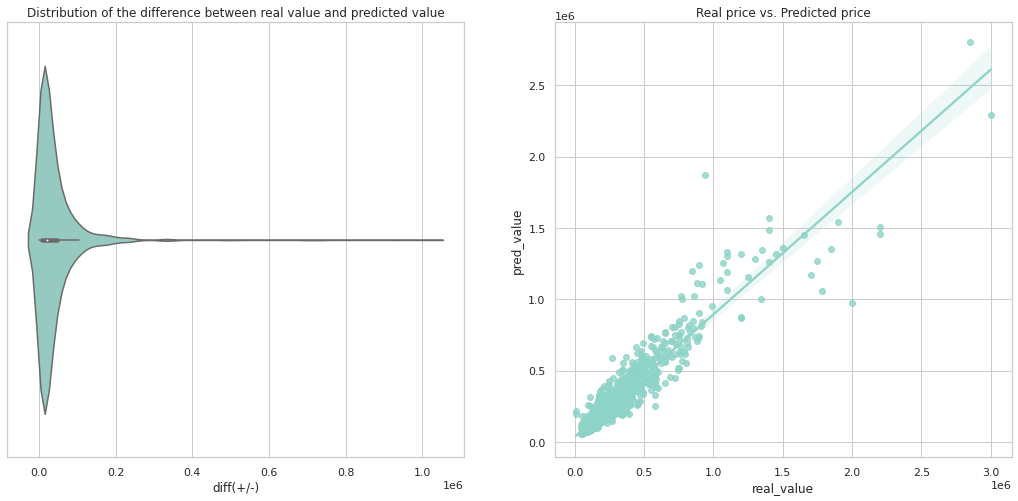

In [545]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(pred_df['diff(+/-)'], ax = ax[0], palette=palette)
sns.regplot('real_value', 'pred_value', data = pred_df, ax = ax[1], color=colors[0])
ax[0].set_title('Distribution of the difference between real value and predicted value')
ax[1].set_title('Real price vs. Predicted price');

In [548]:
# Computing 95% confidence interval
squared_errors = (y_opt_pred - y_test) ** 2
np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([63501.17014611, 87691.68960012])

This tells us that prediction error can fluctuate anywhere between $63501 to $87691.

## Feature importance

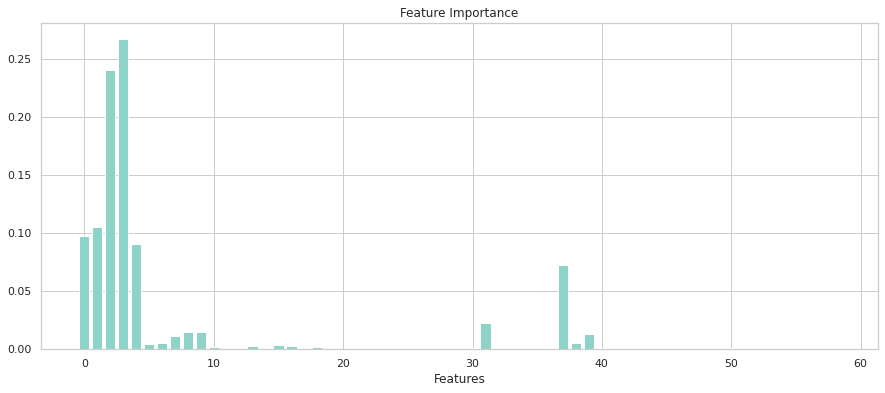

In [553]:
# Feature Importance
plt.figure(figsize = (15,6))
feature_importances = grid_search.best_estimator_.feature_importances_
for i,v in enumerate(feature_importances):
    plt.bar([x for x in range(len(feature_importances))], feature_importances, color=colors[0])
plt.title("Feature Importance")
plt.xlabel("Features");

Most important features:

* lat
* lon
* surface_total_in_m2
* surface_covered_in_m2
* rooms

## 📝 Next steps

* We could use **NLP** to obtain information from the **URL** of the property. This way we could know, for example, if the property has:

    * Balcony
    * Swimming pool
    * Terrace
    * Garden
    * Parking/Garage
    * Grill
    * Air conditioning/heating


* Other **factors** that could be taken into account to predict property prices:

    * Proximity of the properties to the [subway](https://data.buenosaires.gob.ar/dataset/subte-gtfs) and/or **train**.
    * Distance of the properties to the **city center**.
    * Distance of the properties to [public green spaces](https://data.buenosaires.gob.ar/dataset/espacios-verdes).
    * Proximity of properties to **shantytowns**.
    * Proximity to schools.
    * Proximity to hospitals.
    


* We can also incorporate **polynomial variables**.
    


* Use other **metrics** to evaluate, for example: 

    * R2 square
    * MAE (Mean Absolute Error ) 


* We could use other **models**, for example: 

    * Support Vector Machine
    * Polynomial Regression
    * Stochastic Gradient Descent
    * Artificial Neural Networks
    * XGBoost
    * BaggingReggresor
    * AdaboostRegressor
    * Stacking

## Appendix: Kmeans applied to geographic coordinates

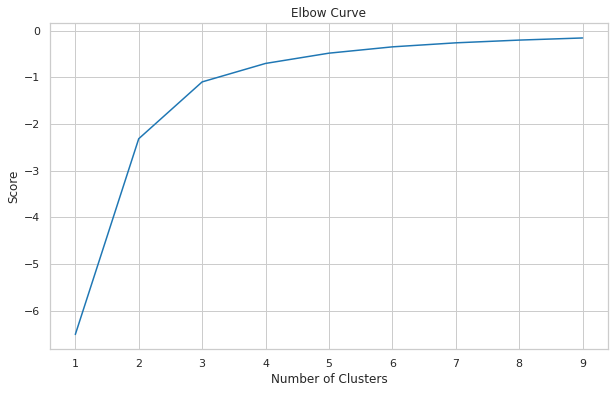

In [559]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
y_lat = df_clean[['lat']]
X_lon = df_clean[['lon']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

In [560]:
lat_lon = df_clean[["lat","lon"]]
lat_lon.head()

lat        lon
0 -34.589972 -58.495662
1 -34.589695 -58.485916
2 -34.595010 -58.499601
3 -34.590804 -58.487456
4 -34.598297 -58.478346

In [561]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(lat_lon[lat_lon.columns[0:2]]) # Compute k-means clustering.
lat_lon['cluster_label'] = kmeans.fit_predict(lat_lon[lat_lon.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_lon[lat_lon.columns[0:2]]) # Labels of each point
lat_lon.head(10)

lat        lon  cluster_label
0 -34.589972 -58.495662              2
1 -34.589695 -58.485916              2
2 -34.595010 -58.499601              2
3 -34.590804 -58.487456              2
4 -34.598297 -58.478346              2
5 -34.595362 -58.494940              2
6 -34.587355 -58.491489              2
7 -34.601823 -58.421568              6
8 -34.601823 -58.421568              6
9 -34.601823 -58.421568              6

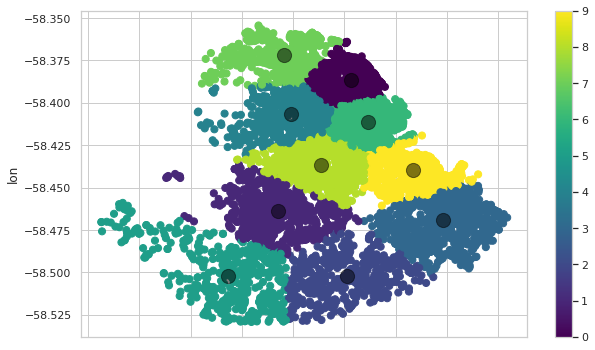

In [563]:
lat_lon.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<h1><center>End</center></h1>

---